In [2]:
# Import Libraries and Dependencies
import matrix_games
from matrix_games import create_A, create_F, create_F_rand, Fx_product, Fx, J_operator

import numpy as np
import matplotlib.pyplot as plt
from random import uniform
from time import perf_counter
import scipy as sp
from scipy.sparse import random
import numpy.linalg as LA

#seed
np.random.seed(78456)

In [9]:
N = 1000
dimN = 700
dimM = 300
sparsity = True

g = lambda x: 0

A = create_A(dimN, dimM, sparsity)

F = Fx(A)

prox_g = lambda q, eps: np.fmax(q,0)

J = J_operator(A)

# starting point
q0 = np.ones(dimN + dimM)

print(F)

<function Fx.<locals>.F at 0x00000250F4AEA9D8>


In [10]:
def adaptive_graal(J, F, prox_g, x1, numb_iter=100, phi=1.5, output=False): 
    begin = perf_counter()
    x, x_ = x1.copy(), x1.copy()
    x0 = x + np.random.randn(x.shape[0]) * 1e-9
    Fx = F(x)
    la = phi / 2 * LA.norm(x - x0) / LA.norm(Fx - F(x0))
    rho = 1. / phi + 1. / phi**2
    values = [J(x)]
    time_list = [perf_counter() - begin]
    th = 1

    for i in range(numb_iter):
        x1 = prox_g(x_ - la * Fx, la)
        Fx1 = F(x1)

        n1 = LA.norm(x1 - x)**2
        n2 = LA.norm(Fx1 - Fx)**2
        n1_div_n2 = n1/n2 if n2 != 0 else la*10

        la1 = min(rho * la, 0.25 * phi * th / la * n1_div_n2)
        x_ = ((phi - 1) * x1 + x_) / phi
        if output:
            print (i, la)
        th = phi * la1 / la
        x, la, Fx = x1, la1, Fx1
        values.append(J(x))
        time_list.append(perf_counter() - begin)
    end = perf_counter()

    print("CPU time for aGRAAL:", end - begin)
    return values, x, x_, time_list

In [11]:
def adaptive_graal_terminate(J, F, prox_g, x1, numb_iter=100, phi=1.5, tol=1e-6, output=False):
    begin = perf_counter()
    x, x_ = x1.copy(), x1.copy()
    x0 = x + np.random.randn(x.shape[0]) * 1e-9
    Fx = F(x)
    la = phi / 2 * LA.norm(x - x0) / LA.norm(Fx - F(x0))
    rho = 1. / phi + 1. / phi**2
    values = [J(x)]
    time_list = [perf_counter() - begin]
    th = 1

    i = 1
    while i <= numb_iter and values[-1] > tol:
        i += 1
        x1 = prox_g(x_ - la * Fx, la)
        Fx1 = F(x1)

        n1 = LA.norm(x1 - x)**2
        n2 = LA.norm(Fx1 - Fx)**2
        n1_div_n2 = np.exp(np.log(n1) - np.log(n2))
        la1 = min(rho * la, 0.25 * phi * th / la * n1_div_n2, 1e6)
        x_ = ((phi - 1) * x1 + x_) / phi
        if output:
            print (i, la)

        th = phi * la1 / la
        x, la, Fx = x1, la1, Fx1
        values.append(J(x))
        time_list.append(perf_counter() - begin)

    end = perf_counter()

    print("CPU time for aGRAAL:", end - begin)
    return values, x, i

# Testing

In [12]:
ans1 = adaptive_graal(J, F, prox_g, q0, numb_iter=N, phi=1.5, output=False)

CPU time for aGRAAL: 0.6615200999999971


In [13]:
print(ans1[0])

[13.627448857049714, 17.30458334056793, 11.078851046169852, 11.116346483177377, 11.027317547897663, 10.934524254671558, 10.879629133788091, 10.823945159850416, 10.763834279553468, 10.695343841006029, 10.656190110747795, 10.624311044251487, 10.588889859255588, 10.549532987037924, 10.505803129018297, 10.457214397885377, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.4412915676739, 10.44129156767

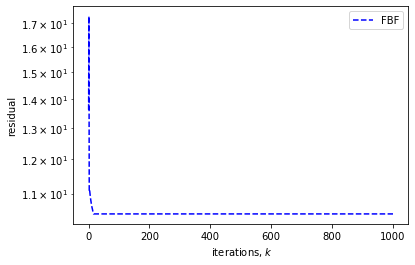

In [14]:
plt.plot(ans1[0], '--b', label = 'FBF')

plt.yscale('log')

plt.xlabel(u' iterations, $k$')
plt.ylabel(u'residual')

plt.legend()
#plt.savefig('figures/nash.pdf', bbox_inches='tight')
plt.show()

In [7]:
? Fx